<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Install Tensorflow
!pip install -q tensorflow-gpu==2.8.2
import tensorflow as tf
print(tf.__version__)

2.8.2


In [10]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28)


In [11]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2967 - accuracy: 0.9125 - val_loss: 0.1561 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1438 - accuracy: 0.9566 - val_loss: 0.1032 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1089 - accuracy: 0.9671 - val_loss: 0.0852 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9727 - val_loss: 0.0827 - val_accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9770 - val_loss: 0.0741 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9782 - val_loss: 0.0690 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0693 - val_accuracy

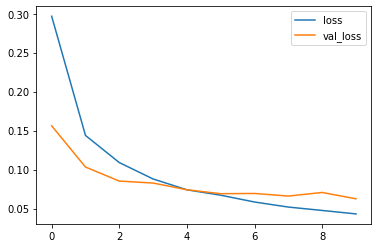

In [14]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

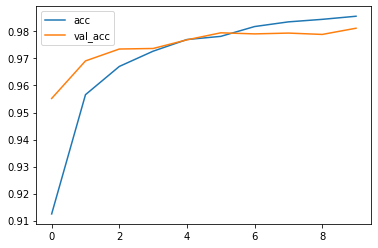

In [15]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0625 - accuracy: 0.9812
[0.062451042234897614, 0.9811999797821045]


Confusion matrix, without normalization
[[ 972    0    1    2    1    0    1    1    2    0]
 [   0 1122    3    2    0    0    2    0    6    0]
 [   3    1 1012    5    0    0    2    5    4    0]
 [   0    0    1  993    0    7    0    3    0    6]
 [   0    0    1    1  965    0    5    1    1    8]
 [   2    0    0    7    1  873    4    1    2    2]
 [   6    3    1    1    2    3  942    0    0    0]
 [   2    5    8    2    0    0    0 1003    3    5]
 [   5    1    0    5    4    4    1    5  944    5]
 [   0    2    0    1   10    4    0    4    2  986]]


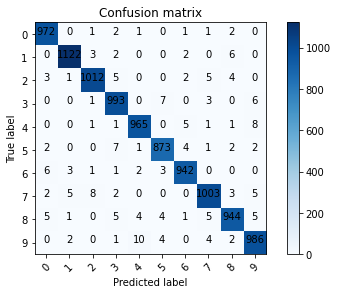

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function print and plot the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

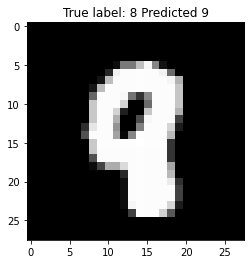

In [22]:
# Show some misclassified 
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i], p_test[i]));